In [1]:
import Backtest_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import matplotlib.ticker as ticker
import statsmodels.api as sm
import matplotlib.ticker as mtick
from Backtest_model import logic_para

In [9]:
Row_data = pd.read_csv(f'clean_backtest_data.csv')
data_use = Row_data.copy()
data_use['mdate'] = pd.to_datetime(data_use['mdate'])
data_use = data_use.rename(columns={
    'mdate': 'Date',
    'ROI': 'Ret',
    'coid': 'Symbol',
    'Close': 'ori_Close'
})

data_use['Close'] = data_use['ori_Close'] * data_use['Adjust_Factor']
data_use['Symbol'] = data_use['Symbol'].astype(str)
data_use = data_use.sort_values('Date')

semiconductor_stocks = [
    '2330',  # 台積電：晶圓代工龍頭
    '2303',  # 聯電：成熟製程晶圓代工
    '2408',  # 南亞科：DRAM 記憶體
    '3711',  # 日月光投控：封裝與測試
    '3034',  # 聯詠：顯示器 IC 設計
    '2454',  # 聯發科：手機與通訊 IC 設計大廠
    '5347',  # 世界先進：8 吋晶圓代工
    '6239',  # 力成：封裝測試服務
    '3264',  # 欣銓：測試服務為主
    '4961'   # 天鈺：顯示驅動 IC
]


pool = ['0050', 'IR0001', '00865B'] + semiconductor_stocks
data_use1 = data_use[data_use['Symbol'].isin(pool)].copy()

data_use1

/var/folders/st/lxg2kchn65x5y9ldzc2d4qgh0000gn/T/ipykernel_4407/1005217286.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Row_data = pd.read_csv(f'clean_backtest_data.csv')


,Unnamed: 0,Symbol,Date,Open,High,Adjust_Factor,Ret,Volume_1000_Shares,Market,Low,ori_Close,Close
80411,80411,3034,2006-01-02,191.00,198.00,0.236557,2.0725,7341.0,TWSE,190.00,197.00,46.601729
77038,77038,IR0001,2006-01-02,0.00,0.00,1.000000,-1.3175,4697272.0,TWSE,0.00,7092.99,7092.990000
121610,121610,2454,2006-01-02,380.00,399.00,0.326414,2.9716,13858.0,TWSE,380.00,398.50,130.075979
75970,75970,0050,2006-01-02,50.75,50.80,0.510858,-1.3659,4920.0,TWSE,50.35,50.55,25.823872
118808,118808,2408,2006-01-02,19.80,20.25,14.357178,-1.0000,43245.0,TWSE,19.70,19.80,284.272124
...,...,...,...,...,...,...,...,...,...,...,...,...
7086882,7086882,IR0001,2025-05-29,47740.52,47904.52,1.000000,-0.0488,7561868.0,TWSE,47457.92,47332.56,47332.560000
6967981,6967981,5347,2025-05-29,84.00,84.80,1.000000,0.3601,27493.0,OTC,82.80,83.60,83.600000
6479822,6479822,3711,2025-05-29,141.50,142.50,1.000000,-2.8169,31149.0,TWSE,138.00,138.00,138.000000
7124777,7124777,2408,2025-05-29,42.45,45.85,1.000000,9.2326,164662.0,TWSE,42.20,45.55,45.550000


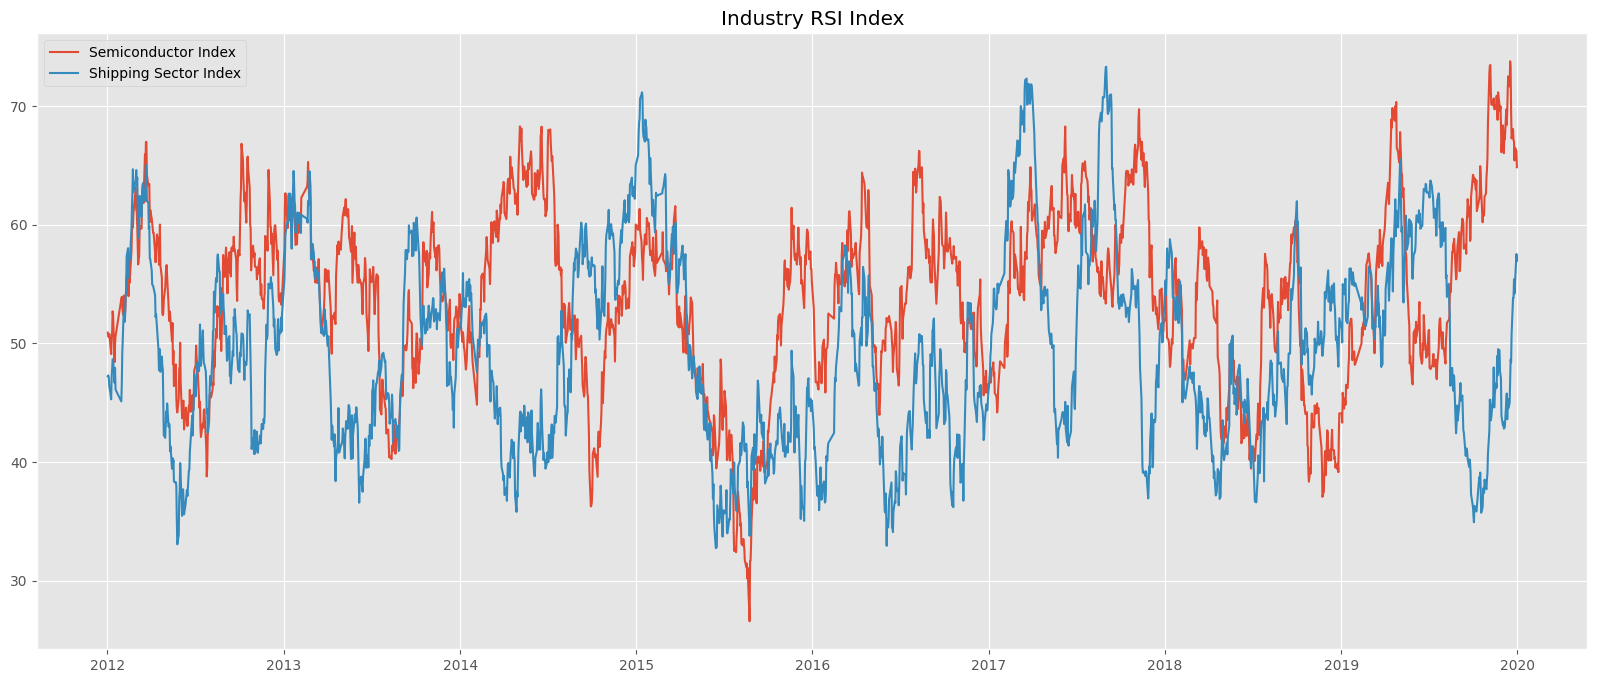

In [4]:
df_ind = pd.read_csv(f'/Users/nemo/Desktop/TQuant/產業指數rsi.csv')
df_ind['mdate'] = pd.to_datetime(df_ind['日期'])
df_ind['mdate'] = df_ind['mdate'].dt.strftime('%Y-%m-%d')
df_ind['mdate'] = pd.to_datetime(df_ind['mdate'])

plt.style.use('ggplot')
plt.figure(figsize = (20, 8))
df_plot = df_ind[df_ind['mdate'] <= '2020-01-01'].copy()
df_plot = df_plot[df_plot['mdate'] >= '2012-01-01'].copy()
plt.plot(df_plot['mdate'], df_plot["IX0028"], label = 'Semiconductor Index')
#plt.plot(df_plot['mdate'], df_plot["IX0039"], label = 'Financial & Insurance Index')
plt.plot(df_plot['mdate'], df_plot["IX0037"], label = 'Shipping Sector Index')
plt.title(f'Industry RSI Index')
plt.legend()
plt.show()

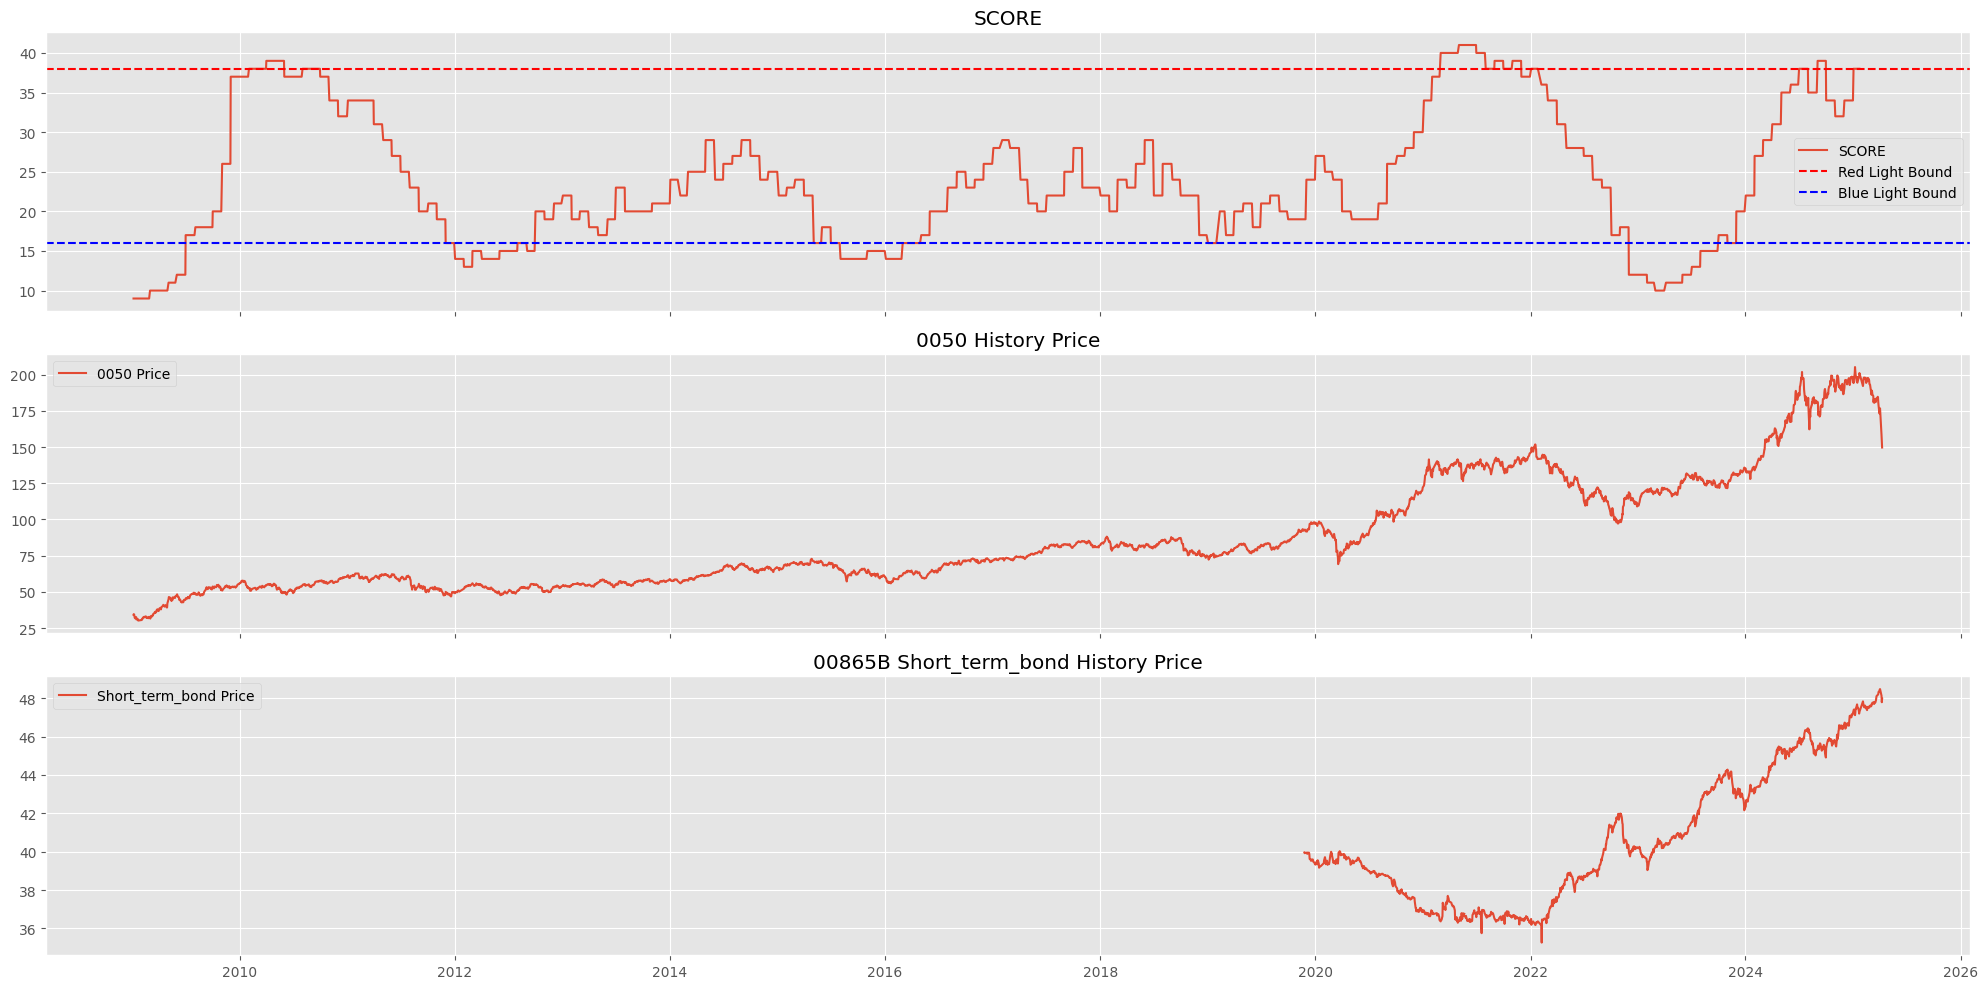

In [ ]:
df = pd.read_csv('business_score_data.csv')
df['mdate'] = pd.to_datetime(df['mdate'])
df['mdate'] = df['mdate'].dt.strftime('%Y-%m-%d')
df['mdate'] = pd.to_datetime(df['mdate'])


import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10), sharex=True)
plt.style.use('ggplot')
axes[1].plot(df['mdate'], df['avgclsd'], label = '0050 Price')
axes[1].set_title(f'0050 History Price')
axes[1].legend()

axes[0].plot(df['mdate'], df['val_shifted'], label = 'SCORE')
axes[0].axhline(y = 38, label = 'Red Light Bound', color = 'red', linestyle = '--')
axes[0].axhline(y= 16, label = 'Blue Light Bound', color = 'blue', linestyle = '--')
axes[0].set_title(f'SCORE')
axes[0].legend()

axes[2].plot(df['mdate'], df['avgclsd_bond'], label = 'Short_term_bond Price')
axes[2].set_title(f'00865B Short_term_bond History Price')
axes[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
para = logic_para()
para.score = None
para.last_score = None
para.state = False
para.a = 0
para.b = None
para.semi = None
para.boat = None
para.cycle = False
bull = []
bear = []
ind_start = []
ind_end = []




def logic(idx, date, portfolio, performance, market, factor_data, para):

    today_data = factor_data[factor_data['mdate'].shift(1) == pd.to_datetime(date)]
    para.last_score = para.score  

    if not today_data.empty:
        para.score = today_data['val_shifted'].iloc[-1]
    else:
        # 若無資料，就沿用舊的 score
        para.score = para.last_score

    if para.score <= 16 and para.state == False:
        
        Backtest_model.order(portfolio=portfolio, symbol='00865B', target=0.0, Market=market)
        Backtest_model.order(portfolio=portfolio, symbol='0050', target=1.0, Market=market)
        # Backtest_model.order(portfolio=portfolio, symbol='00631L', target=1.0, Market=market)
        print(f'{date}：進入股市')
        bull.append(pd.to_datetime(date))
        para.state = True

    if para.score >= 38 and para.state == True:
        # Backtest_model.order(portfolio=portfolio, symbol='00631L', target=0.0, Market=market)
        Backtest_model.order(portfolio=portfolio, symbol='0050', target=0.0, Market=market)
        Backtest_model.order(portfolio=portfolio, symbol='00865B', target=1.0, Market=market)
        print(f'{date}：離開股市')
        bear.append(pd.to_datetime(date))
        para.state = False

    if para.score > 16 and para.score < 38 and para.a == 0:
        para.a = 1
        print(f'{date}：初次進入景氣循環')
        bull.append(pd.to_datetime(date))
        if para.state == False:
            Backtest_model.order(portfolio=portfolio, symbol='0050', target=1.0, Market=market)
            # Backtest_model.order(portfolio=portfolio, symbol='00631L', target=1.0, Market=market)
            para.state = True


    today_data2 = df_ind[df_ind['mdate'] == pd.to_datetime(date)]
    para.boat = today_data2['IX0037'].iloc[0]
    para.semi = today_data2['IX0028'].iloc[0]

    if para.state == True:
        # ===================================== 產業論動開始 =========================================
        if para.boat >= 65 and para.cycle == False:
            print(f"{date}：產業輪動開始")
            ind_start.append(pd.to_datetime(date))
            Backtest_model.order(portfolio=portfolio, symbol='0050', target=0.0, Market=market)
            para.b = para.semi
            para.cycle = True
            for i in semiconductor_stocks:
                Backtest_model.order(portfolio=portfolio, symbol=i, target=1.0/len(semiconductor_stocks), Market=market)


        if para.cycle == True and para.semi >= para.b + 15:
            print(f"{date}：產業輪動結束")
            ind_end.append(pd.to_datetime(date))
            para.cycle = False
            for i in semiconductor_stocks:
                Backtest_model.order(portfolio=portfolio, symbol=i, target=0.0, Market=market)
            Backtest_model.order(portfolio=portfolio, symbol='0050', target=1.0, Market=market)
        # ===================================== 產業論動結束 =========================================

    if para.state == False and para.cycle == True:
        for i in semiconductor_stocks:
            Backtest_model.order(portfolio=portfolio, symbol=i, target=0.0, Market=market)
        Backtest_model.order(portfolio=portfolio, symbol='0050', target=0.0, Market=market)
        para.cycle = False
        print(f'{date}：景氣循環結束 --- 強制結束產業輪動部位')


result = Backtest_model.run_backtest(data = data_use1,
                       strategy_function = logic, 
                       start_date = '2020-01-01', 
                       end_date = '2025-03-10', 
                       Benchmark_code = 'IR0001',
                       factor_data = df, 
                       initial_cash = 1_000_000,
                       logic_para=para)

# 呼叫函數 compute_stat() 計算回測績效數據
result.compute_stat()

-------------------------------------------------- Strategy Logic Start --------------------------------------------------
2020-01-02：初次進入景氣循環
2020-06-16：產業輪動開始
2021-02-26：離開股市
2021-02-26：景氣循環結束 --- 強制結束產業輪動部位
2022-11-30：進入股市
2024-01-04：產業輪動開始
2024-03-08：產業輪動結束
2024-05-13：產業輪動開始
2024-06-28：離開股市
2024-06-28：景氣循環結束 --- 強制結束產業輪動部位
-------------------------------------------------- Strategy Logic End --------------------------------------------------


,指標,數值
0,累積報酬率,3.3076
1,年化報酬率,0.3404
2,年化波動度,0.1656
3,夏普比率,2.0557
4,最大回撤,-0.2822
5,Calmar比率,1.2066
6,Alpha (年化),0.2251
7,Beta,0.4651
8,Benchmark 累積報酬率,1.2007
9,Benchmark 年化報酬率,0.1715


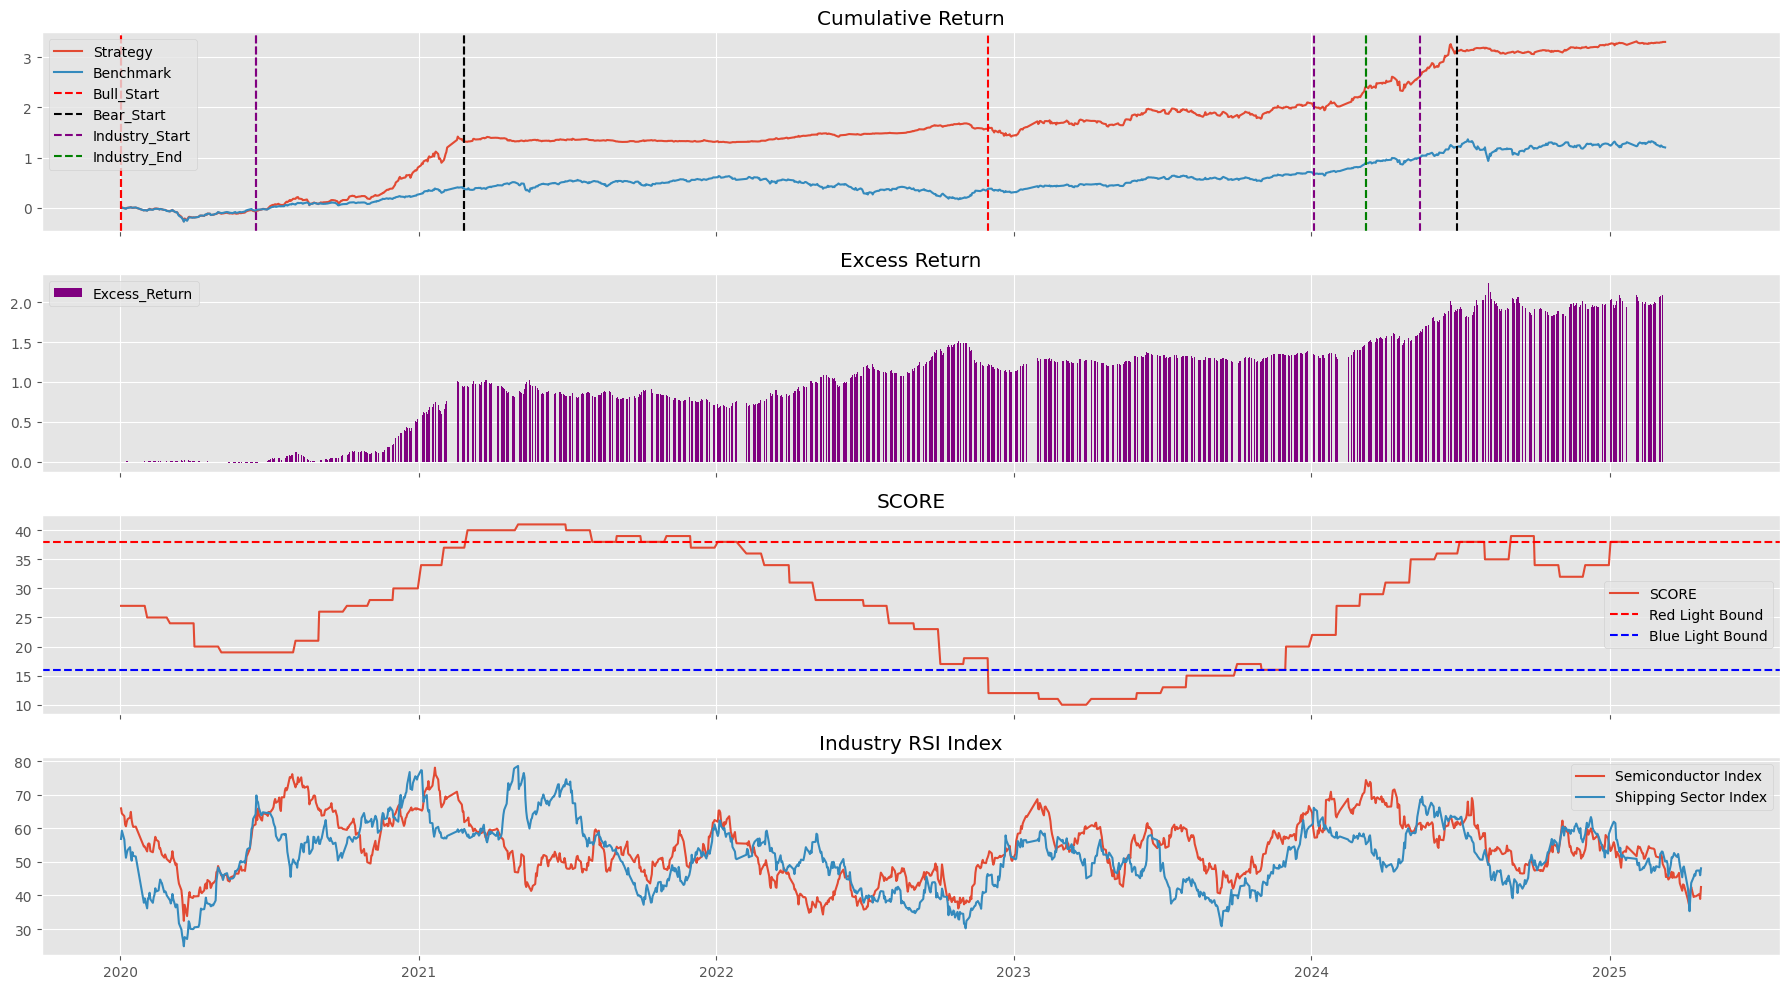

In [40]:
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(18, 10), sharex=True)

axes[0].plot(result.df['Date'], result.df['Adjust_strategy_cumulative_return'], label = 'Strategy')
axes[0].plot(result.df['Date'], result.df['Benchmark_cumulative_return'], label = 'Benchmark')

for idx, i in enumerate(bull):
    if idx == 0:
        axes[0].axvline(x = i, linestyle = '--', color = 'red', label = 'Bull_Start')
    axes[0].axvline(x = i, linestyle = '--', color = 'red')

for idx, i in enumerate(bear):
    if idx == 0:
        axes[0].axvline(x = i, linestyle = '--', color = 'black', label = 'Bear_Start')
    axes[0].axvline(x = i, linestyle = '--', color = 'black')

for idx, i in enumerate(ind_start):
    if idx == 0:
        axes[0].axvline(x = i, linestyle = '--', color = 'purple', label = 'Industry_Start')
    axes[0].axvline(x = i, linestyle = '--', color = 'purple')

for idx, i in enumerate(ind_end):
    if idx == 0:
        axes[0].axvline(x = i, linestyle = '--', color = 'green', label = 'Industry_End')
    axes[0].axvline(x = i, linestyle = '--', color = 'green')


axes[0].legend()
axes[0].set_title(f'Cumulative Return')


axes[1].bar(result.df['Date'], 
            result.df['Adjust_strategy_cumulative_return']\
            - result.df['Benchmark_cumulative_return'],
            label = 'Excess_Return', color = 'purple')
axes[1].legend()
axes[1].set_title(f'Excess Return')

df2 = df[df['mdate'] >= '2020-01-01'].copy()
axes[2].plot(df2['mdate'], df2['val_shifted'], label = 'SCORE')
axes[2].axhline(y = 38, label = 'Red Light Bound', color = 'red', linestyle = '--')
axes[2].axhline(y= 16, label = 'Blue Light Bound', color = 'blue', linestyle = '--')
axes[2].set_title(f'SCORE')
axes[2].legend()

df_plot2 = df_ind[df_ind['mdate'] >= '2020-01-01'].copy()
axes[3].plot(df_plot2['mdate'], df_plot2["IX0028"], label = 'Semiconductor Index')
axes[3].plot(df_plot2['mdate'], df_plot2["IX0037"], label = 'Shipping Sector Index')
axes[3].set_title(f'Industry RSI Index')
axes[3].legend()

plt.tight_layout()
plt.show()